In [6]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

In [7]:
from sklearn.model_selection import train_test_split

X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

#split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3, random_state=32)

In [8]:
model = tree.DecisionTreeClassifier(max_depth = 7, random_state=32)

In [9]:
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       147
           1       0.60      0.62      0.61        84

    accuracy                           0.71       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.71      0.71      0.71       231



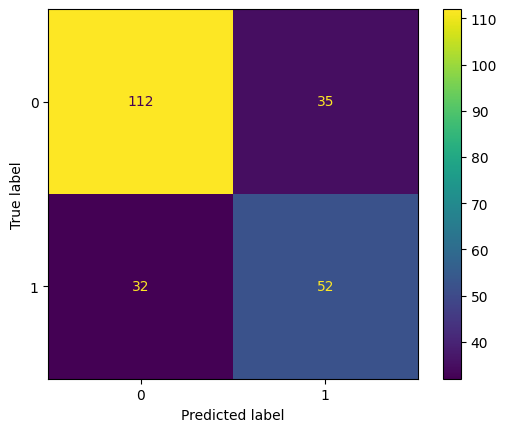

In [11]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [12]:
# recall 
52/(52+32)

0.6190476190476191

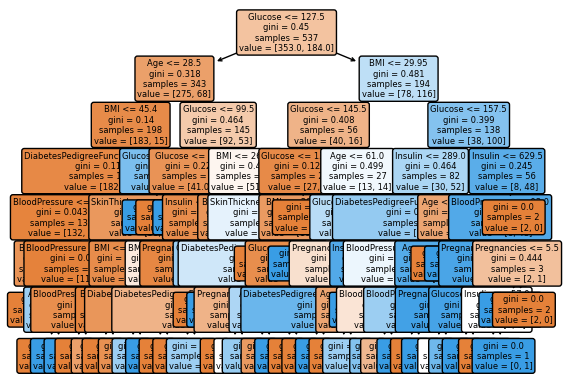

<Figure size 640x480 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
tree.plot_tree(model, feature_names = list(X.columns),
               filled=True, fontsize=6, rounded=True)

plt.show()
plt.savefig("tree.svg")

In [14]:
diabetes_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

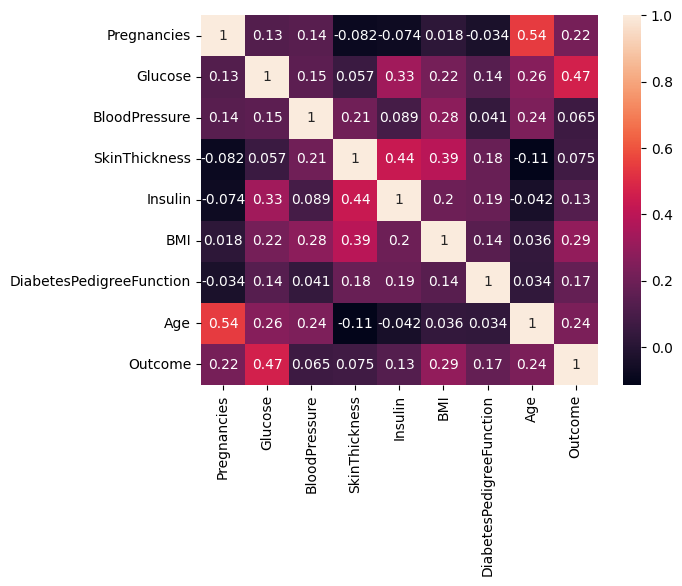

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(diabetes_df.corr(), annot=True)

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Load the dataset
diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.fillna(diabetes_df.mean(), inplace=True)

# Split data into features and target
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Initialize accuracy variable
accuracy = 0

# Keep training the model until accuracy is between 0.7 and 0.8
while accuracy < 0.7 or accuracy > 0.8:
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

    # Train the decision tree classifier
    model = DecisionTreeClassifier(max_depth=7, random_state=32)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    report = classification_report(y_test, y_pred, output_dict=True)
    print(classification_report(y_test, y_pred))
    
    # Extract accuracy value
    accuracy = report['accuracy']

    # Print message if accuracy is not within the desired range
    if accuracy < 0.7 or accuracy > 0.8:
        print("Model accuracy is not within the desired range. Retraining the model...")

# Print the final accuracy value
print("Final accuracy:", accuracy)


              precision    recall  f1-score   support

           0       0.78      0.76      0.77       147
           1       0.60      0.62      0.61        84

    accuracy                           0.71       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.71      0.71      0.71       231

Final accuracy: 0.70995670995671


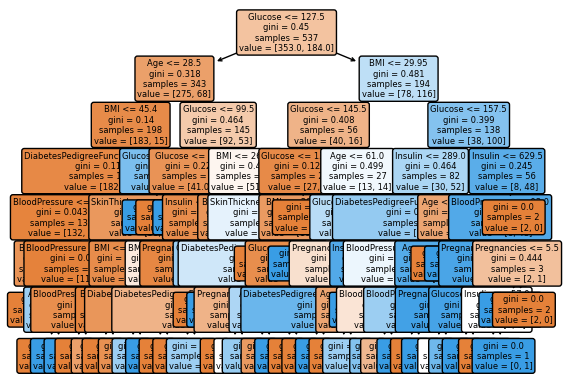

<Figure size 640x480 with 0 Axes>

In [29]:
import matplotlib.pyplot as plt
tree.plot_tree(model, feature_names = list(X.columns),
               filled=True, fontsize=6, rounded=True)

plt.show()
plt.savefig("tree.svg")

In [34]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

df = pd.read_csv("./diabetes.csv")
def preprocess_data(df):

   
    columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
    df[columns_with_zeros] = df[columns_with_zeros].replace(0, np.nan)
    
    df.dropna(inplace=True)
    
    return df

def train_decision_tree(X, y):
  
    smt = SMOTE(random_state=42)
    X_sm, y_sm = smt.fit_resample(X, y)
    
    X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)
    
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    evaluate_model(y_test, y_pred)
    
    return model

def evaluate_model(y_true, y_pred):
    """
    Evaluates the model using various metrics.
    """
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("ROC AUC:", roc_auc_score(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))


df = preprocess_data(df)

X = df.drop('Outcome', axis=1)
y = df['Outcome']

model = train_decision_tree(X, y)

Accuracy: 0.8095238095238095
Precision: 0.8666666666666667
Recall: 0.8125
ROC AUC: 0.8086890243902439

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.80      0.77        41
           1       0.87      0.81      0.84        64

    accuracy                           0.81       105
   macro avg       0.80      0.81      0.80       105
weighted avg       0.81      0.81      0.81       105



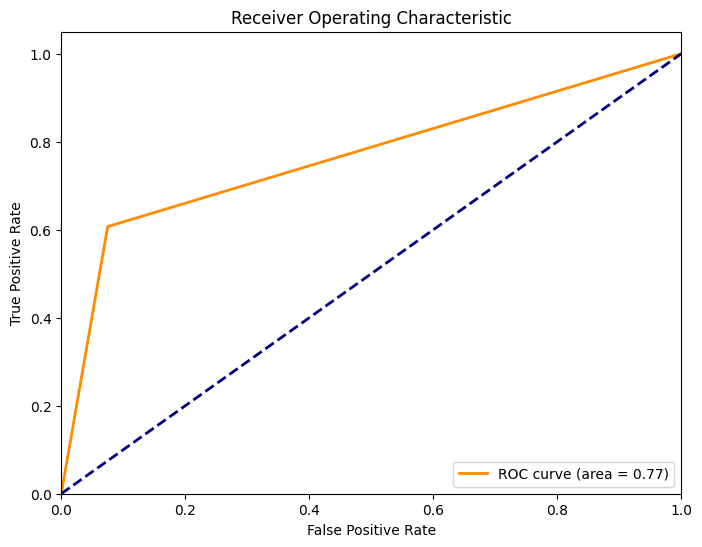

In [42]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

def plot_roc_curve(model, X_test, y_test):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return roc_auc
curve = plot_roc_curve(model, X_test, y_test)

SVM Performance:
Accuracy: 0.7705627705627706
Precision: 0.7540983606557377
Recall: 0.5476190476190477
AUC: 0.7227891156462586


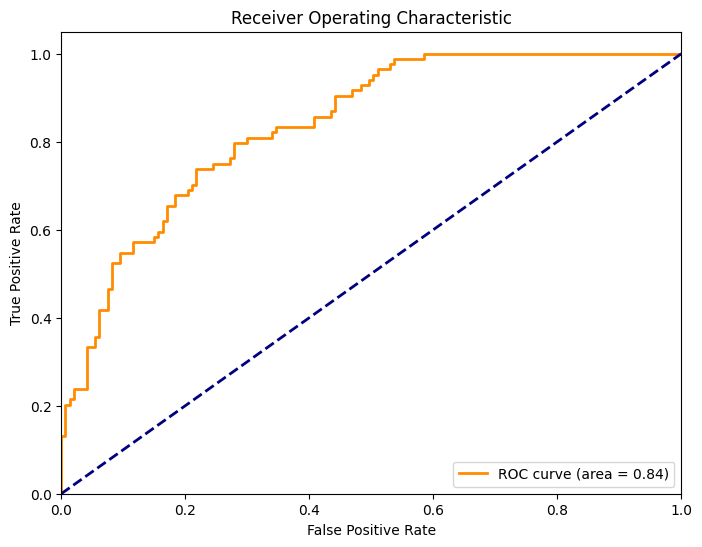

In [37]:
from sklearn.svm import SVC

def train_linear_svm(X_train, y_train, X_test, y_test):
    classifier = SVC(kernel='linear', probability=True)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    # Evaluate the SVM
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    svm_auc = roc_auc_score(y_test, y_pred)
    
    print("SVM Performance:")
    print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nAUC: {svm_auc}")
    
    # Plot ROC Curve
    plot_roc_curve(classifier, X_test, y_test)

    return classifier
svm_model = train_linear_svm(X_train, y_train, X_test, y_test)

In [44]:
def format_names(names):

    name_list = [name_dict['name'] for name_dict in names]
    

    if len(name_list) > 1:
       
        return ', '.join(name_list[:-2] + [' & '.join(name_list[-2:])])
    elif name_list:
        return name_list[0]
    else:
        return ""

names = [{'name': 'Niles'}, {'name': 'C.C.'}, {'name': 'Fran'}]
answer = format_names(names)
answer


'Niles, C.C. & Fran'